In [1]:
%matplotlib inline  
import pandas as pd
from datetime import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt, pi
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter

plt.rcParams['figure.figsize'] = [16, 10]



In [2]:
43178/3600

11.99388888888889

In [3]:
# load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


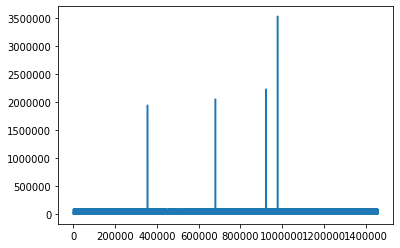

In [6]:
# try to clean up the outlier case
plt.figure()
plt.plot(train.trip_duration)

(array([1.45663e+06, 7.90000e+01, 1.93100e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

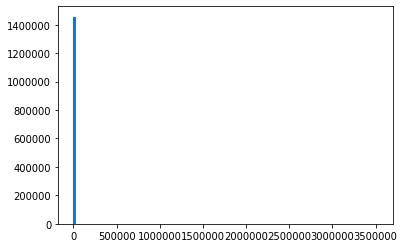

In [7]:
plt.figure()
plt.hist(train.trip_duration.values, bins=100)


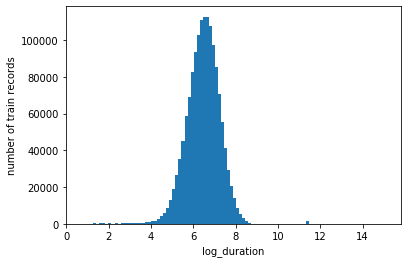

In [8]:
train['log_duration'] = np.log(train['trip_duration'].values + 1)
plt.hist(train['log_duration'].values, bins = 100)
plt.xlabel('log_duration')
plt.ylabel('number of train records')
plt.show()

In [9]:
train['start_timestamp'] = pd.to_datetime(train['pickup_datetime'])
train.loc[:, 'start_date'] = train['start_timestamp'].dt.date
train.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_duration,start_timestamp,start_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14 17:24:55,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12 00:43:35,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19 11:35:24,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06 19:32:31,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26 13:30:55,2016-03-26


In [10]:
test['start_timestamp'] = pd.to_datetime(test['pickup_datetime'])
test.loc[:, 'start_date'] = test['start_timestamp'].dt.date
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,start_timestamp,start_date
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2016-06-30 23:59:58,2016-06-30
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2016-06-30 23:59:53,2016-06-30
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,2016-06-30 23:59:47,2016-06-30
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,2016-06-30 23:59:41,2016-06-30
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,2016-06-30 23:59:33,2016-06-30


In [11]:
# get rid off the data 3 standard deviation away
logMean = np.mean(train['log_duration'])
logSTD = np.std(train['log_duration'])
train = train[train['log_duration']<logMean+3*logSTD]
train = train[train['log_duration']>logMean-3*logSTD]

In [12]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_duration,start_timestamp,start_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14 17:24:55,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12 00:43:35,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19 11:35:24,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06 19:32:31,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26 13:30:55,2016-03-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,2016-04-08 13:31:04,2016-04-08
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,2016-01-10 07:35:15,2016-01-10
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,2016-04-22 06:57:41,2016-04-22
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,2016-01-05 15:56:26,2016-01-05


/Users/fangche@cisco.com/Library/Python/3.7/lib/python/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


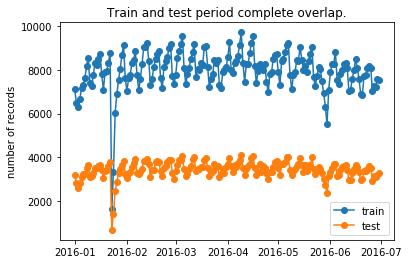

In [13]:
# time point overlap
plt.plot(train.groupby('start_date').count()[['id']], 'o-', label='train')
plt.plot(test.groupby('start_date').count()[['id']], 'o-', label='test')
plt.title('Train and test period complete overlap.')
plt.legend(loc=0)
plt.ylabel('number of records')
plt.show()

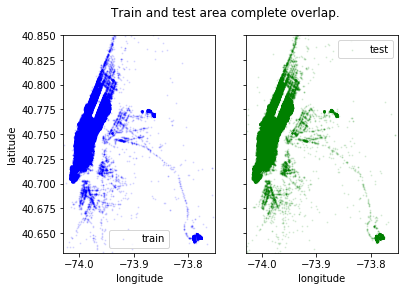

In [23]:
N = 100000
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(test['pickup_longitude'].values[:N], test['pickup_latitude'].values[:N],
              color='green', s=1, label='test', alpha=0.1)
fig.suptitle('Train and test area complete overlap.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [25]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [26]:
haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

array([1.49852078, 1.80550717, 6.3850985 , ..., 7.82460578, 1.09256389,
       1.13404196])

In [27]:
train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
train.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
train.loc[:, 'direction'] = bearing_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

test.loc[:, 'distance_haversine'] = haversine_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)
test.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)
test.loc[:, 'direction'] = bearing_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)


train.loc[:, 'center_lat'] = (train['pickup_latitude'].values + train['dropoff_latitude'].values) / 2
train.loc[:, 'center_lng'] = (train['pickup_longitude'].values + train['dropoff_longitude'].values) / 2
test.loc[:, 'center_lat'] = (test['pickup_latitude'].values + test['dropoff_latitude'].values) / 2
test.loc[:, 'center_lng'] = (test['pickup_longitude'].values + test['dropoff_longitude'].values) / 2

In [34]:
# seems there are still some outliers

train.loc[:, 'distance_haversine'].describe()

count    1.447935e+06
mean     3.457277e+00
std      4.288636e+00
min      0.000000e+00
25%      1.244163e+00
50%      2.106008e+00
75%      3.891640e+00
max      1.240909e+03
Name: distance_haversine, dtype: float64

In [35]:
train.loc[:, 'start_weekday'] = train['start_timestamp'].dt.weekday
train.loc[:, 'start_weekofyear'] = train['start_timestamp'].dt.weekofyear
train.loc[:, 'start_hour'] = train['start_timestamp'].dt.hour
train.loc[:, 'start_minute'] = train['start_timestamp'].dt.minute

# start_dt, this feature is the time in seconds between current time and min time in history
train.loc[:, 'start_dt'] = (train['start_timestamp'] - train['start_timestamp'].min()).dt.total_seconds()
train.loc[:, 'start_week_hour'] = train['start_weekday'] * 24 + train['start_hour']

test.loc[:, 'start_weekday'] = test['start_timestamp'].dt.weekday
test.loc[:, 'start_weekofyear'] = test['start_timestamp'].dt.weekofyear
test.loc[:, 'start_hour'] = test['start_timestamp'].dt.hour
test.loc[:, 'start_minute'] = test['start_timestamp'].dt.minute
test.loc[:, 'start_dt'] = (test['start_timestamp'] - test['start_timestamp'].min()).dt.total_seconds()
test.loc[:, 'start_week_hour'] = test['start_weekday'] * 24 + test['start_hour']
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance_dummy_manhattan,direction,center_lat,center_lng,start_weekday,start_weekofyear,start_hour,start_minute,start_dt,start_week_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1.735433,99.970196,40.766769,-73.973392,0,11,17,24,6369878.0,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2.430506,-117.153768,40.734858,-73.989948,6,23,0,43,14085798.0,144
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,8.203575,-159.680165,40.737013,-73.992180,1,3,11,35,1596907.0,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1.661331,-172.737700,40.713345,-74.011154,2,14,19,32,8364734.0,67
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1.199457,179.473585,40.787865,-73.972988,5,12,13,30,7392638.0,133


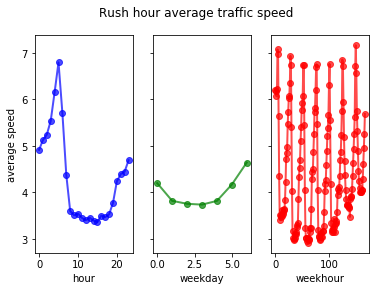

In [38]:
# average speed_h is the average speed for haversine distance
train.loc[:, 'avg_speed_h'] = 1000 * train['distance_haversine'] / train['trip_duration']
train.loc[:, 'avg_speed_m'] = 1000 * train['distance_dummy_manhattan'] / train['trip_duration']
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(train.groupby('start_hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(train.groupby('start_weekday').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)
ax[2].plot(train.groupby('start_week_hour').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('hour')
ax[1].set_xlabel('weekday')
ax[2].set_xlabel('weekhour')
ax[0].set_ylabel('average speed')
fig.suptitle('Rush hour average traffic speed')
plt.show()

In [79]:
train.loc[:, 'start_lat_bin'] = np.round(train['pickup_latitude'], 3)
train.loc[:, 'start_lng_bin'] = np.round(train['pickup_longitude'], 3)
train.loc[:, 'start_lat_bin']

0          40.768
1          40.739
2          40.764
3          40.720
4          40.793
            ...  
1458639    40.746
1458640    40.747
1458641    40.769
1458642    40.749
1458643    40.782
Name: start_lat_bin, Length: 1447935, dtype: float64

In [48]:
gby_cols = ['start_lat_bin','start_lng_bin']
coord_speed = train.groupby(gby_cols).mean()[['avg_speed_h']].reset_index()
coord_count = train.groupby(gby_cols).count()[['id']].reset_index() # notice the class size is unbalanced in this case


,start_lat_bin,start_lng_bin,id
count,12351.000000,12351.000000,12351.000000
mean,40.736526,-73.944477,117.232208
std,0.188142,0.484175,349.464974
min,34.360000,-121.933000,1.000000
25%,40.696000,-73.982000,1.000000
50%,40.740000,-73.953000,4.000000
75%,40.772000,-73.919000,41.000000
max,51.881000,-61.336000,8694.000000


In [50]:
coord_stats = pd.merge(coord_speed, coord_count, on=gby_cols)
coord_stats # summarize the average speed, and number of trips for each sample region

,start_lat_bin,start_lng_bin,avg_speed_h,id
0,34.360,-65.848,0.000000,1
1,34.712,-75.354,359.730518,1
2,35.082,-71.800,1458.615554,1
3,35.310,-72.074,50.225452,1
4,36.029,-77.441,0.000000,1
...,...,...,...,...
12346,43.140,-72.591,0.000000,1
12347,43.487,-74.195,0.000000,1
12348,43.912,-71.882,0.000000,1
12349,44.372,-66.972,190.297588,1


In [51]:
coord_stats = coord_stats[coord_stats['id'] > 100]
# choose the samples where there are more than 100 trips

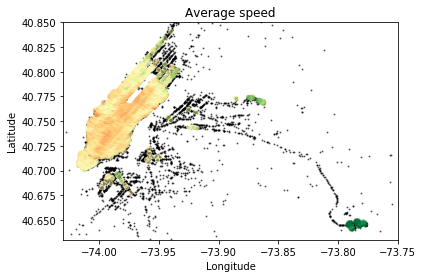

In [52]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:N], train.pickup_latitude.values[:N],
           color='black', s=1, alpha=0.5)
ax.scatter(coord_stats.start_lng_bin.values, coord_stats.start_lat_bin.values,
           c=coord_stats.avg_speed_h.values,
           cmap='RdYlGn', s=20, alpha=0.5, vmin=1, vmax=8)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Average speed')
plt.show()

# the speed is slow close to the center of the city

In [80]:
# create bins for start location, center location
train.loc[:, 'start_lat_bin'] = np.round(train['pickup_latitude'], 2)
train.loc[:, 'start_lng_bin'] = np.round(train['pickup_longitude'], 2)
train.loc[:, 'center_lat_bin'] = np.round(train['center_lat'], 2)
train.loc[:, 'center_lng_bin'] = np.round(train['center_lng'], 2)
train.loc[:, 'start_dt_bin'] = (train['start_dt'] // (3 * 3600))


test.loc[:, 'start_lat_bin'] = np.round(test['pickup_latitude'], 2)
test.loc[:, 'start_lng_bin'] = np.round(test['pickup_longitude'], 2)
test.loc[:, 'center_lat_bin'] = np.round(test['center_lat'], 2)
test.loc[:, 'center_lng_bin'] = np.round(test['center_lng'], 2)
test.loc[:, 'start_dt_bin'] = (test['start_dt'] // (3 * 3600))

In [55]:
# then we do kmean clustering on the geo location
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])


In [56]:
# note down the start cluster and end cluster
train.loc[:, 'start_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'end_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
test.loc[:, 'start_cluster'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])
test.loc[:, 'end_cluster'] = kmeans.predict(test[['dropoff_latitude', 'dropoff_longitude']])

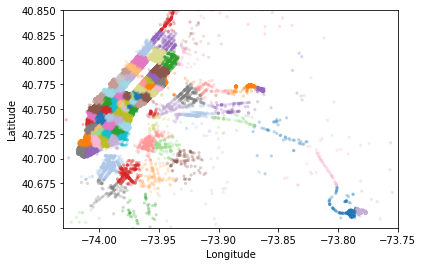

In [72]:
# 以下为画出好看图要素： 第一确定城市边界， 第二， s 是marker大小 lw 代表line width 调成0 代表marker没有line
# alpha 代表图像透明程度
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:N], train.pickup_latitude.values[:N], s=10, lw=0,
           c = train.start_cluster[:N].values, cmap='tab20', alpha=0.3)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [74]:
# key part of feature engineering: assign average speed 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447935 entries, 0 to 1458643
Data columns (total 31 columns):
id                          1447935 non-null object
vendor_id                   1447935 non-null int64
pickup_datetime             1447935 non-null object
dropoff_datetime            1447935 non-null object
passenger_count             1447935 non-null int64
pickup_longitude            1447935 non-null float64
pickup_latitude             1447935 non-null float64
dropoff_longitude           1447935 non-null float64
dropoff_latitude            1447935 non-null float64
store_and_fwd_flag          1447935 non-null object
trip_duration               1447935 non-null int64
log_duration                1447935 non-null float64
start_timestamp             1447935 non-null datetime64[ns]
start_date                  1447935 non-null object
distance_haversine          1447935 non-null float64
distance_dummy_manhattan    1447935 non-null float64
direction                   1447935 non-nul

In [78]:
train.start_week_hour

0           17
1          144
2           35
3           67
4          133
          ... 
1458639    109
1458640    151
1458641    102
1458642     39
1458643     38
Name: start_week_hour, Length: 1447935, dtype: int64

In [94]:
# 以下这一步很重要， 
for gby_col in ['start_hour', 'start_date', 'start_dt_bin',
               'start_week_hour', 'start_cluster', 'end_cluster']:
    gby = train.groupby(gby_col).mean()[['avg_speed_h', 'avg_speed_m', 'trip_duration']]
    # 将column rename start_hour_gby_avg_speed_h， etc
    gby.columns = ['%s_gby_%s' % (col, gby_col) for col in gby.columns] 
    # 将新的columns merge到原来的data frame 上面
    # 没有搞懂这种写法的意图。 但是似乎不是很重要， 主要是将产生的新的column merge到原来的df 上去
    train = pd.merge(train, gby, how='left', left_on = gby_col, right_index = True)
    test = pd.merge(test, gby, how='left', left_on = gby_col, right_index = True)

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447935 entries, 0 to 1458643
Data columns (total 52 columns):
id                                   1447935 non-null object
vendor_id                            1447935 non-null int64
pickup_datetime                      1447935 non-null object
dropoff_datetime                     1447935 non-null object
passenger_count                      1447935 non-null int64
pickup_longitude                     1447935 non-null float64
pickup_latitude                      1447935 non-null float64
dropoff_longitude                    1447935 non-null float64
dropoff_latitude                     1447935 non-null float64
store_and_fwd_flag                   1447935 non-null object
trip_duration                        1447935 non-null int64
log_duration                         1447935 non-null float64
start_timestamp                      1447935 non-null datetime64[ns]
start_date                           1447935 non-null object
distance_haversine     

In [88]:
['%s_gby_%s' % (col, gby_col) for col in gby.columns]

['avg_speed_h_gby_end_cluster_gby_end_cluster',
 'avg_speed_m_gby_end_cluster_gby_end_cluster',
 'trip_duration_gby_end_cluster_gby_end_cluster']

In [213]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a
dfc= df_a
dfc.first_name[dfc['first_name']== 'Alex']='Emma'
df_a

,subject_id,first_name,last_name
0,1,Emma,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [96]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [97]:
pd.merge(df_a, df_b, right_index=True, left_index=True)


,subject_id_x,first_name_x,last_name_x,subject_id_y,first_name_y,last_name_y
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [114]:
# use the index from the right as the join keys
pd.merge(df_a, df_b, how='left',on = 'subject_id', right_index=True)

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,NaN,NaN
4,5,Ayoung,Atiches,NaN,NaN


,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [119]:
pd.merge(df_a, df_b, how='left',on = 'subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


In [116]:
pd.merge(df_a, df_b, right_index=True, left_index=True)

,subject_id_x,first_name_x,last_name_x,subject_id_y,first_name_y,last_name_y
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [109]:
pd.merge(df_a, df_b, left_on='subject_id',right_on='subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [127]:
gby

,avg_speed_h_gby_end_cluster,avg_speed_m_gby_end_cluster,trip_duration_gby_end_cluster
end_cluster,,,
0,3.782017,4.907631,635.269696
1,3.224223,4.252027,722.011715
2,3.702694,4.860910,748.503744
3,6.938273,8.756168,1494.347443
4,7.701849,10.602643,2516.529877
...,...,...,...
95,3.477640,4.566815,836.253732
96,3.880373,4.975774,672.391225
97,3.659700,4.638010,679.467621


In [128]:
gby_col

'end_cluster'

In [130]:
train.end_cluster

0          88
1          15
2          42
3          72
4          45
           ..
1458639     0
1458640    61
1458641    42
1458642    95
1458643    16
Name: end_cluster, Length: 1447935, dtype: int32

In [136]:
x = pd.merge(train['end_cluster'], gby, how='left', on = gby_col)

In [132]:
x

,end_cluster,avg_speed_h_gby_end_cluster,avg_speed_m_gby_end_cluster,trip_duration_gby_end_cluster
0,88,3.439489,4.521783,640.366765
1,15,3.613846,4.706902,712.850962
2,42,4.626733,6.047570,1011.116262
3,72,4.672943,6.181269,1036.974791
4,45,4.164298,5.329045,670.681064
...,...,...,...,...
1458639,0,3.782017,4.907631,635.269696
1458640,61,4.982616,6.433929,714.895719
1458641,42,4.626733,6.047570,1011.116262
1458642,95,3.477640,4.566815,836.253732


Begin of modeling

In [138]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 65 columns):
id                                     625134 non-null object
vendor_id                              625134 non-null int64
pickup_datetime                        625134 non-null object
passenger_count                        625134 non-null int64
pickup_longitude                       625134 non-null float64
pickup_latitude                        625134 non-null float64
dropoff_longitude                      625134 non-null float64
dropoff_latitude                       625134 non-null float64
store_and_fwd_flag                     625134 non-null object
start_timestamp                        625134 non-null datetime64[ns]
start_date                             625134 non-null object
distance_haversine                     625134 non-null float64
distance_dummy_manhattan               625134 non-null float64
direction                              625134 non-null float64
center_l

In [156]:
feature_names = list(train.columns)
do_not_use_for_training = ['store_and_fwd_flag','pickup_datetime','dropoff_datetime','pickup_longitude','dropoff_longitude','dropoff_latitude','pickup_latitude','id', 'log_duration', 'trip_duration', 'start_timestamp', 'start_date', 'avg_speed_h', 'avg_speed_m', 'start_lat_bin', 'start_lng_bin', 'center_lat_bin', 'center_lng_bin', 'start_dt_bin', 'start_timestamp_group']
feature_names = [f for f in train.columns if f not in do_not_use_for_training]
len(feature_names)

51

In [157]:
y = np.log(train['trip_duration'].values + 1) 

In [158]:
processedTrain = train[feature_names]
processedTrain.head()

,vendor_id,passenger_count,distance_haversine,distance_dummy_manhattan,direction,center_lat,center_lng,start_weekday,start_weekofyear,start_hour,...,trip_duration_gby_start_dt_bin_y,avg_speed_h_gby_start_week_hour_y,avg_speed_m_gby_start_week_hour_y,trip_duration_gby_start_week_hour_y,avg_speed_h_gby_start_cluster_y,avg_speed_m_gby_start_cluster_y,trip_duration_gby_start_cluster_y,avg_speed_h_gby_end_cluster_y,avg_speed_m_gby_end_cluster_y,trip_duration_gby_end_cluster_y
0,2,1,1.498521,1.735433,99.970196,40.766769,-73.973392,0,11,17,...,962.081017,3.610883,4.670637,871.303621,3.615353,4.585475,776.582369,3.439489,4.521783,640.366765
1,1,1,1.805507,2.430506,-117.153768,40.734858,-73.989948,6,23,0,...,759.420204,4.345766,5.588819,800.403612,3.681657,4.777425,734.684982,3.613846,4.706902,712.850962
2,2,1,6.385098,8.203575,-159.680165,40.737013,-73.992180,1,3,11,...,939.825460,2.982912,3.858382,981.519909,3.381359,4.346032,860.472872,4.626733,6.047570,1011.116262
3,2,1,1.485498,1.661331,-172.737700,40.713345,-74.011154,2,14,19,...,795.470303,3.634129,4.701706,807.003009,4.185894,5.415406,915.928465,4.672943,6.181269,1036.974791
4,2,1,1.188588,1.199457,179.473585,40.787865,-73.972988,5,12,13,...,753.573025,3.737106,4.848274,796.538162,4.374067,5.685213,684.910390,4.164298,5.329045,670.681064


In [159]:
feature_names

['vendor_id',
 'passenger_count',
 'distance_haversine',
 'distance_dummy_manhattan',
 'direction',
 'center_lat',
 'center_lng',
 'start_weekday',
 'start_weekofyear',
 'start_hour',
 'start_minute',
 'start_dt',
 'start_week_hour',
 'start_cluster',
 'end_cluster',
 'avg_speed_h_gby_start_hour_x',
 'avg_speed_m_gby_start_hour_x',
 'trip_duration_gby_start_hour_x',
 'avg_speed_h_gby_start_date_x',
 'avg_speed_m_gby_start_date_x',
 'trip_duration_gby_start_date_x',
 'avg_speed_h_gby_start_dt_bin_x',
 'avg_speed_m_gby_start_dt_bin_x',
 'trip_duration_gby_start_dt_bin_x',
 'avg_speed_h_gby_start_week_hour_x',
 'avg_speed_m_gby_start_week_hour_x',
 'trip_duration_gby_start_week_hour_x',
 'avg_speed_h_gby_start_cluster_x',
 'avg_speed_m_gby_start_cluster_x',
 'trip_duration_gby_start_cluster_x',
 'avg_speed_h_gby_end_cluster_x',
 'avg_speed_m_gby_end_cluster_x',
 'trip_duration_gby_end_cluster_x',
 'avg_speed_h_gby_start_hour_y',
 'avg_speed_m_gby_start_hour_y',
 'trip_duration_gby_start_h

In [160]:
processedTest = test[feature_names]
processedTest.head()

,vendor_id,passenger_count,distance_haversine,distance_dummy_manhattan,direction,center_lat,center_lng,start_weekday,start_weekofyear,start_hour,...,trip_duration_gby_start_dt_bin_y,avg_speed_h_gby_start_week_hour_y,avg_speed_m_gby_start_week_hour_y,trip_duration_gby_start_week_hour_y,avg_speed_h_gby_start_cluster_y,avg_speed_m_gby_start_cluster_y,trip_duration_gby_start_cluster_y,avg_speed_h_gby_end_cluster_y,avg_speed_m_gby_end_cluster_y,trip_duration_gby_end_cluster_y
0,1,1,2.746426,2.913304,-3.595224,40.744354,-73.989151,3,26,23,...,906.967671,4.579931,5.900332,854.823277,3.557878,4.595502,766.353579,3.314509,4.233815,811.667025
1,1,1,2.759239,3.104805,172.278835,40.667698,-73.962006,3,26,23,...,906.967671,4.579931,5.900332,854.823277,4.592186,5.700842,755.862275,6.020077,7.235116,1695.534547
2,1,1,1.306155,1.846340,133.326248,40.733553,-73.991798,3,26,23,...,906.967671,4.579931,5.900332,854.823277,3.710577,4.820732,725.982731,3.680668,4.697324,706.917098
3,2,1,5.269088,7.163347,-150.956833,40.751184,-73.971249,3,26,23,...,906.967671,4.579931,5.900332,854.823277,4.065030,5.340979,664.706549,3.680668,4.697324,706.917098
4,1,1,0.960842,1.354164,130.260381,40.758682,-73.965862,3,26,23,...,906.967671,4.579931,5.900332,854.823277,3.611922,4.740524,754.440241,3.702406,4.880253,710.788066


In [175]:
Xtr, Xv, ytr, yv = train_test_split(processedTrain, y, test_size=0.2, random_state=1)


In [176]:
dtrain = xgb.DMatrix(Xtr, label=ytr)
dvalid = xgb.DMatrix(Xv, label=yv)

In [177]:
dtest = xgb.DMatrix(processedTest)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [178]:
xgb_pars = {'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,
            'subsample': 0.8, 'lambda': 1.0, 'nthread': 2, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

In [179]:
model = xgb.train(xgb_pars, dtrain, 60, watchlist, early_stopping_rounds=50,
                  maximize=False, verbose_eval=10)

[0]	train-rmse:4.23546	valid-rmse:4.23522
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[10]	train-rmse:0.375878	valid-rmse:0.380835
[20]	train-rmse:0.321403	valid-rmse:0.330289
[30]	train-rmse:0.310759	valid-rmse:0.322755
[40]	train-rmse:0.30525	valid-rmse:0.320013
[50]	train-rmse:0.300416	valid-rmse:0.317499
[59]	train-rmse:0.296146	valid-rmse:0.315254


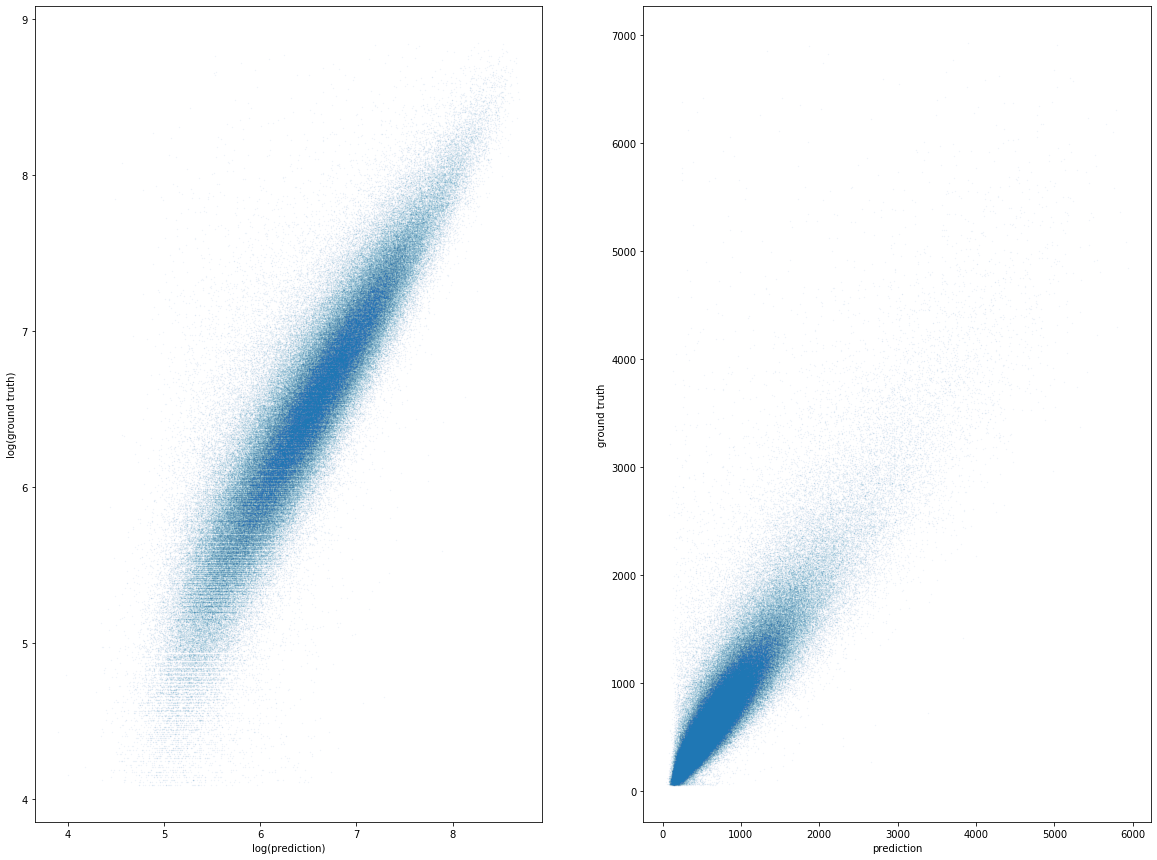

In [180]:
ypred = model.predict(dvalid)
fig,ax = plt.subplots(ncols=2)
ax[0].scatter(ypred, yv, s=0.1, alpha=0.1)
ax[0].set_xlabel('log(prediction)')
ax[0].set_ylabel('log(ground truth)')
ax[1].scatter(np.exp(ypred)-1, np.exp(yv)-1, s=0.1, alpha=0.1)
ax[1].set_xlabel('prediction')
ax[1].set_ylabel('ground truth')
plt.show()

In [181]:
ytest = model.predict(dtest)


In [182]:
ytest0 = np.exp(ytest) - 1


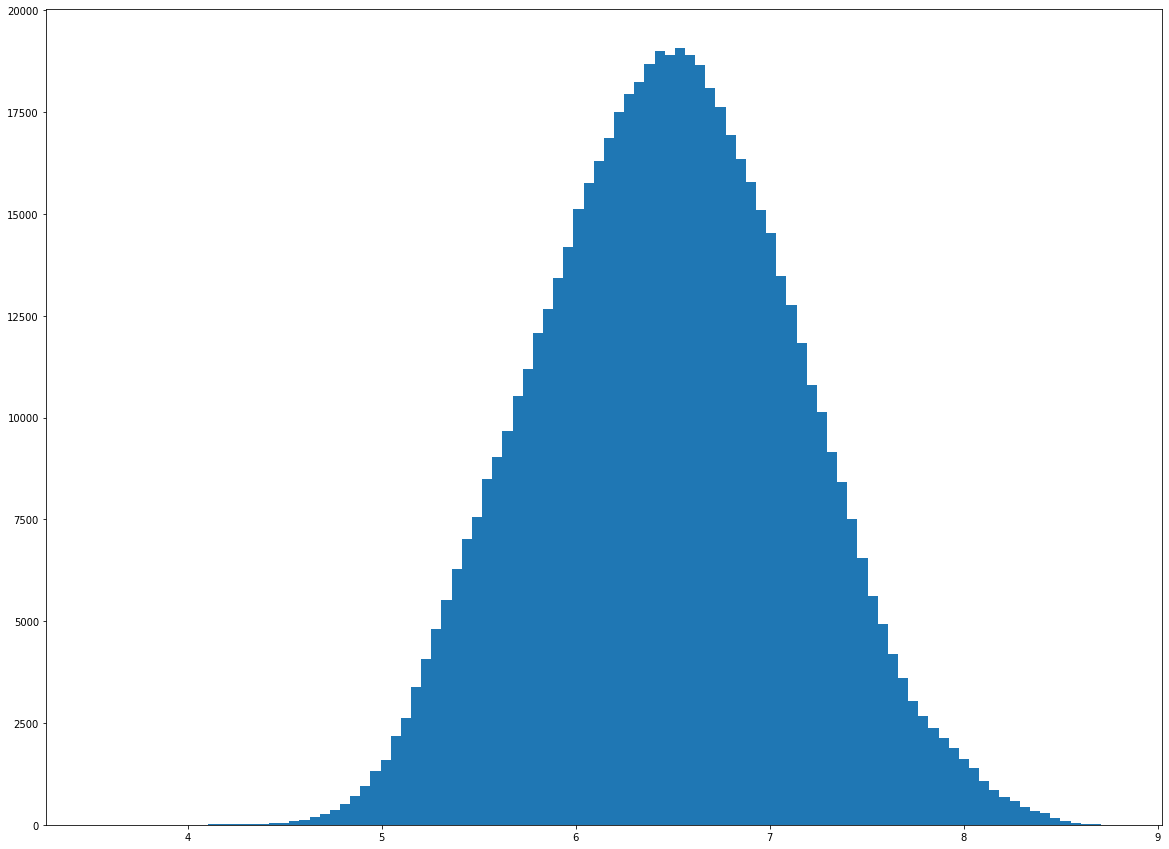

In [183]:
plt.figure()
plt.hist(ytest, bins = 100)
plt.show()



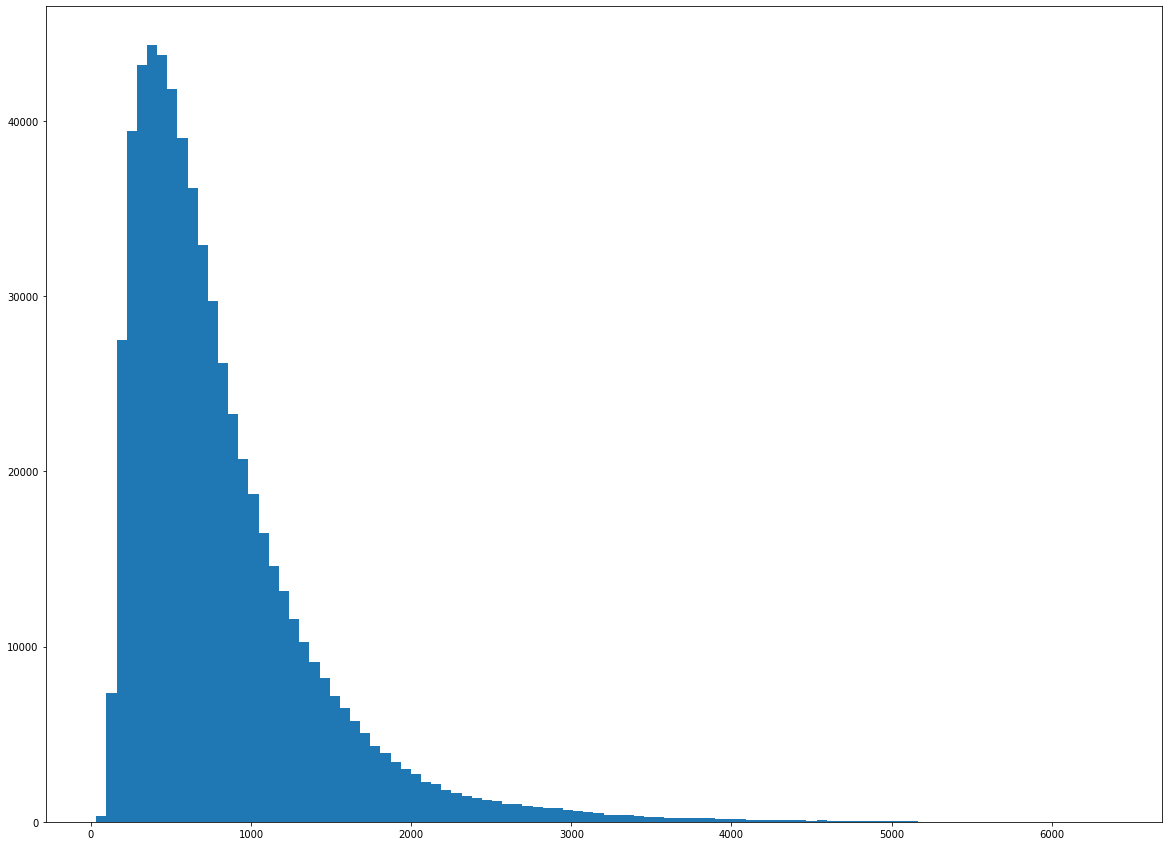

In [184]:
plt.figure()
plt.hist(ytest0, bins = 100)
plt.show()

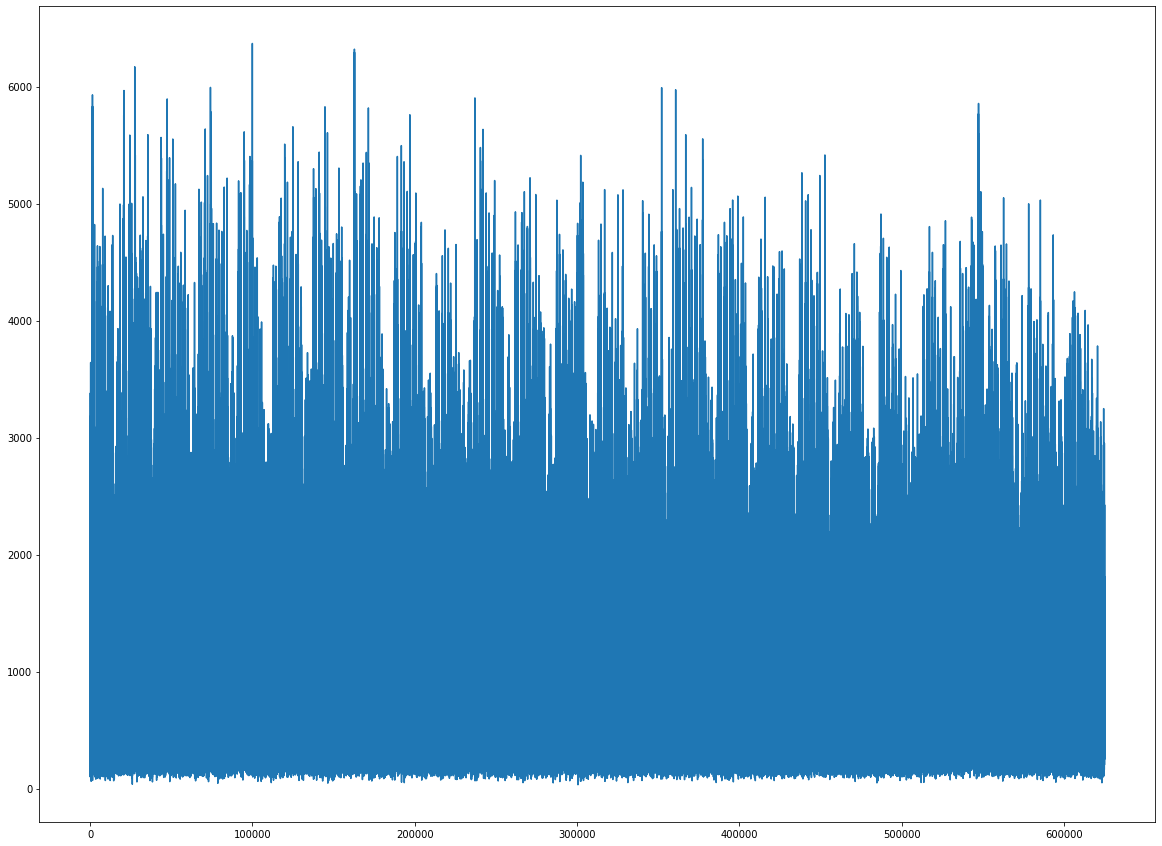

In [185]:
plt.figure()
plt.plot(ytest0)
plt.show()

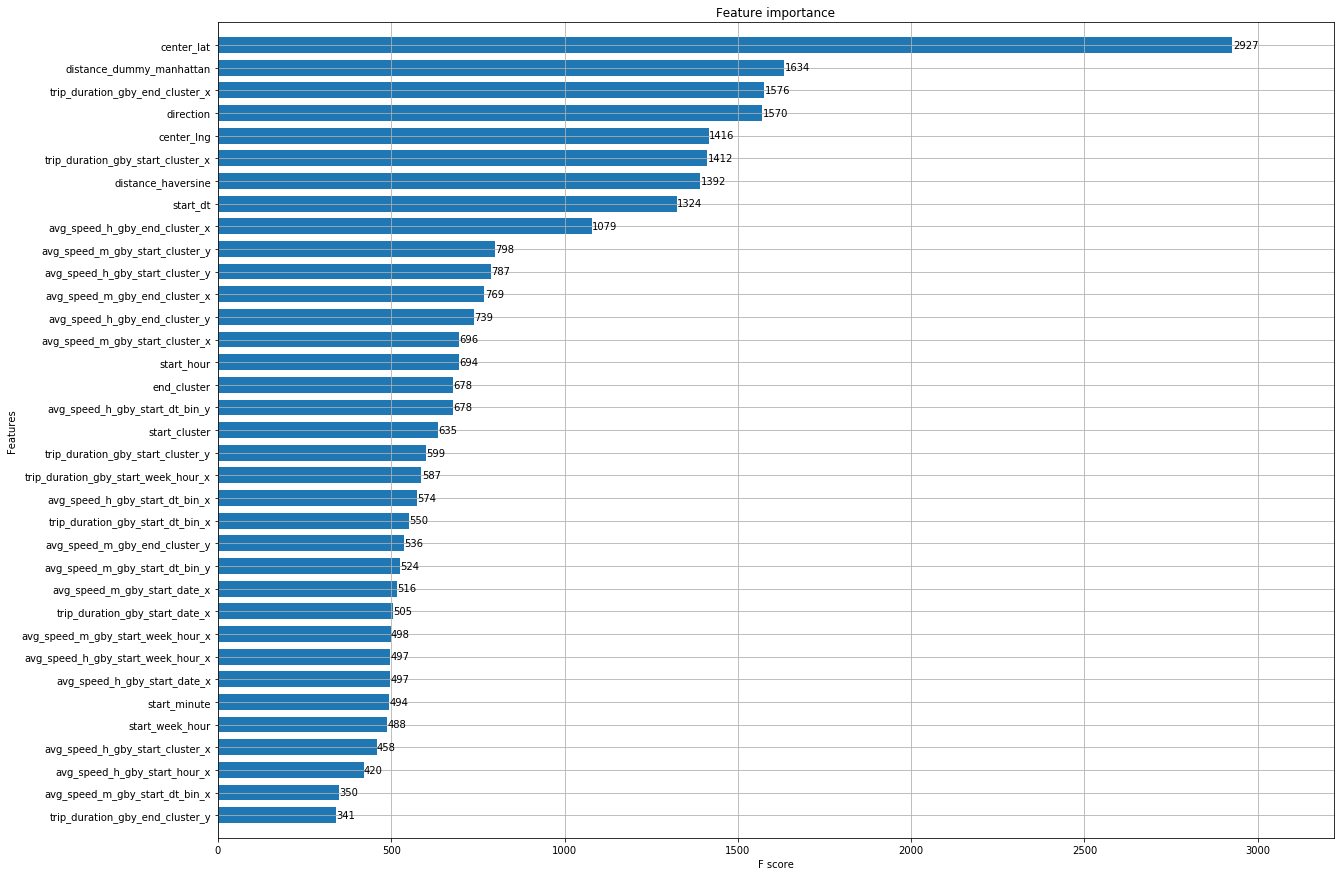

In [215]:
plt.rcParams['figure.figsize'] = [20, 15]


xgb.plot_importance(model, max_num_features=35, height=0.7)


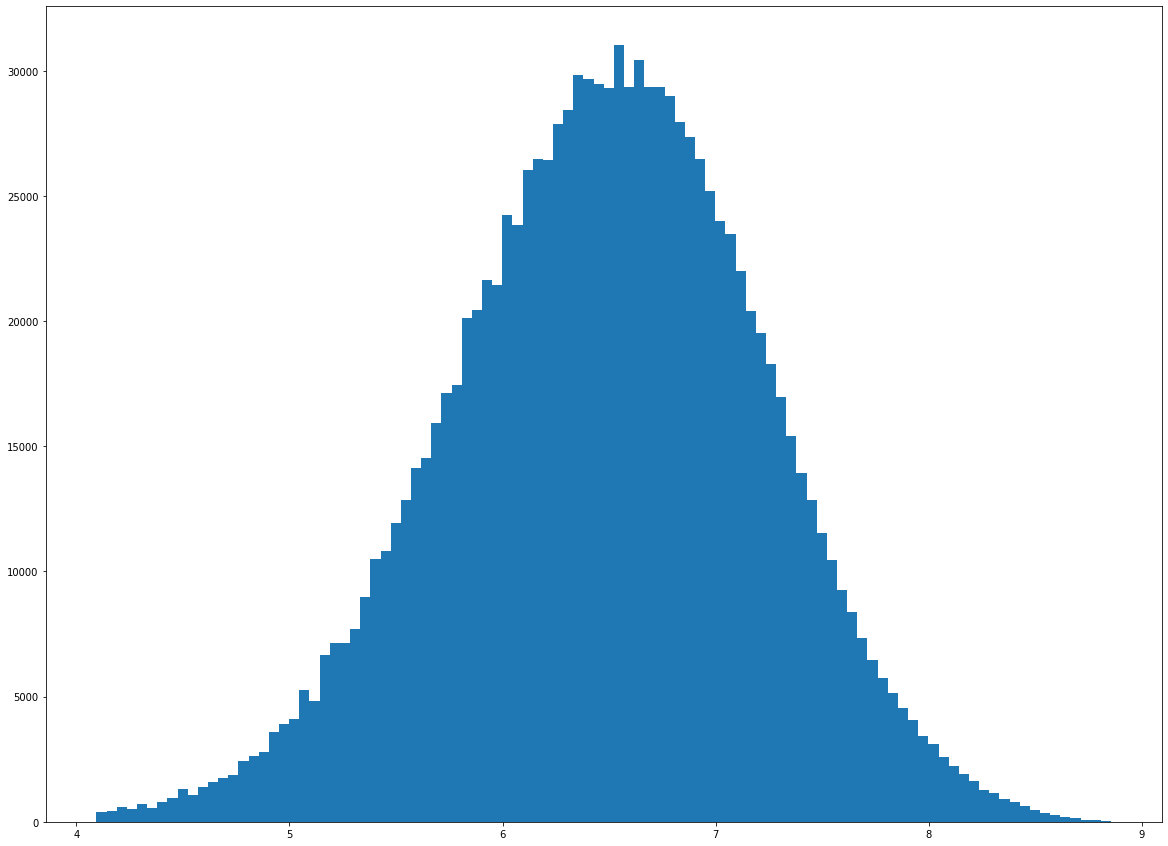

In [189]:
plt.figure()
plt.hist(ytr, bins=100)
plt.show()